### IDs:
Insert yours IDs to the cell below

ID #1: 066466061

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [1]:
import numpy as np 
import scipy 
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt

def num_of_samples_required_for_k_with_confidence(sucess_pro, k, confidence):
    
    probs = []
    n = 1
    while True:
        prob = scipy.stats.binom.sf(max(0, k-1), n, sucess_pro)
        probs.append(prob)
        if prob >= confidence: 
            return n, probs
        n+= 1


In [2]:
n, _ = num_of_samples_required_for_k_with_confidence(0.03, 1, 0.85 )
n

63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [3]:
res,_ = num_of_samples_required_for_k_with_confidence(0.04, 1, 0.95 )
res

74

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [4]:
def plot_distrbution(results, threshold, k):

  plt.bar(np.arange(0, len(results)),results,  color='r', label="Probs")
  plt.axhline( y=threshold, color= 'b')
  plt.axvline( x=len(results)-1,color='b',linestyle="solid", alpha = 0.5)
  plt.ylim([0,1.0])
  plt.xlabel("Number of samples")
  plt.ylabel(("Probability for {} defective products".format(k)))
  plt.legend()
  plt.show()

In [5]:
res1, dist1 = num_of_samples_required_for_k_with_confidence(0.1, 5, 0.90)
res2, dist2 = num_of_samples_required_for_k_with_confidence(0.3, 15, 0.90)

res1, res2

(78, 64)

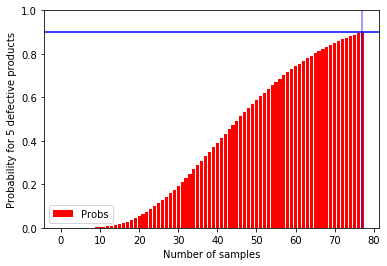

In [6]:
plot_distrbution(dist1,0.9, 5 )

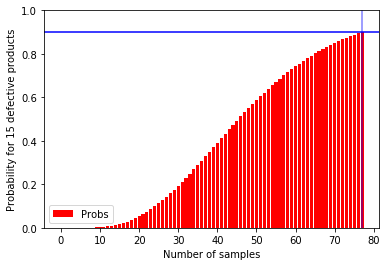

In [7]:
plot_distrbution(dist1,0.9, 15 )

Calculation for the first case Threshold is 5: 
$$ 1-P(X\leq 5-1) =1-\sum_{k=1}^{4}\binom{n}{k} p^k(1-p)^{n-k}=1-\sum_{k=1}^{4}\binom{n}{k} 0.1^k(0.9)^{n-k}=0.9 $$
**$\sum_{k=1}^{4}\binom{n}{k} 0.1^k(0.9)^{n-k}=0.1$
 
We can see that in the second case the number of samples is smaller.<br>
In the second case the defect probability is 3 time larger than the first case 0.1 vs 0.3 and the target k is also 3 time larger 5 vs 15, so we can conclude that the probability for defect has stronger effect on the distribution than the number of defect required.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [8]:
sh_pop = 16000
sh_mean_rent = 6300

rg_pop = 22000
rg_mean_rent = 4200

median_rent = 4600

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Case 1 population: SH populationSize:16000 MeanResnt:6300.0 MedianRent:4600.0 IQR:7185.75 
Case 1 population: RG populationSize:22000 MeanResnt:4200.0 MedianRent:4600.0 IQR:8699.75 
Case 2 population: SH populationSize:16000 MeanResnt:6300.0 MedianRent:4600.0 IQR:7307.814766191548 
Case 2 population: RG populationSize:22000 MeanResnt:4200.0 MedianRent:4600.0 IQR:8099.75 


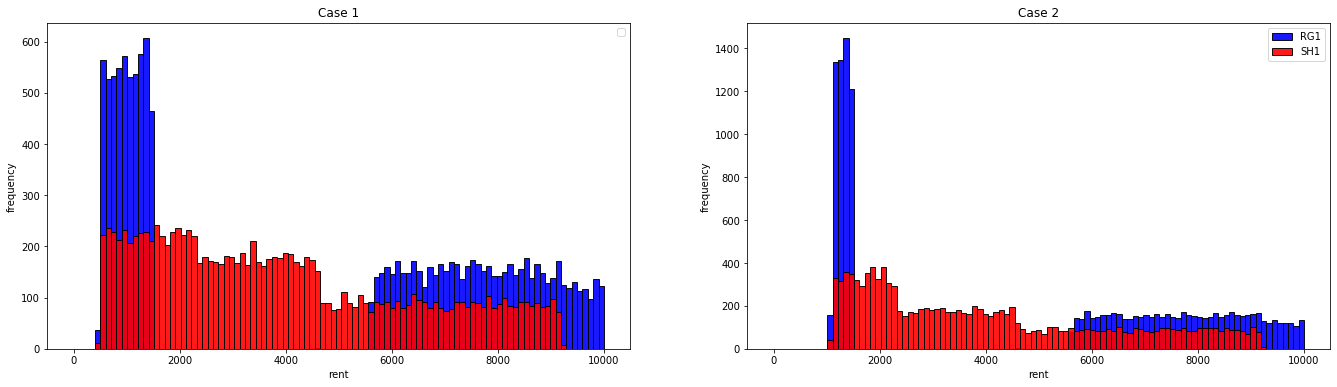

In [9]:
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt

def generate_data_1(pop_size, median_rent, mean_rent, start_end, seed):
    
    q_size = int(pop_size/4)
    
    np.random.seed(seed=seed)
    
    q1 = np.random.randint(start_end[0], start_end[1], size=q_size).astype(np.float)

    q2 = np.random.randint(start_end[2], start_end[3], size=q_size).astype(np.float)
   
    q2[-1] = median_rent
    
    q3 = np.random.randint(start_end[4], start_end[5], size=q_size).astype(np.float)
    q3[0] = median_rent
    
    q4 = np.random.randint(start_end[6], start_end[7], size=q_size).astype(np.float)

    res = np.concatenate((q1, q2, q3, q4))
    miss = ((mean_rent * pop_size) - np.sum(res))/(q_size-1)
    
    if miss > 0:
        q4[1:] += miss
    else:
        q2[:-1] += miss
        

    res1 = np.concatenate((q1, q2, q3, q4))
    
    np.random.seed(seed=None)
    return  res1

def plot_sh1(seed, start):
    
    start_end = [start, median_rent/2, median_rent/2, median_rent, median_rent + 1, median_rent * 2,
                median_rent * 2 + 1, median_rent * 3]
    
    res = generate_data_1(sh_pop, median_rent, sh_mean_rent, start_end, seed = seed)
    return res 
   
def plot_rg1(seed, start):
    
    start_end = [\
                   start, 1500,\
                   median_rent/2, median_rent,\
                   
                   median_rent + 1000, median_rent * 2,\
                   
                   median_rent * 2 + 1, median_rent * 3]
        
    res = generate_data_1(rg_pop, median_rent, rg_mean_rent, start_end, seed = seed)
    
    return res 

def plt_population(res, case, population_name, plot_var):
    
    variance_text = ''
    if plot_var:
        variance_text = 'Variance {}'.format(np.var(res))
        
    print('{} population: {} populationSize:{} MeanResnt:{} MedianRent:{} IQR:{} {}'.format(case, population_name,  len(res), np.mean(res), np.median(res),
                                                                       iqr(res), variance_text))
    
def scenario(ax, seed, case, start, plot_var=False):

    rg1 = plot_rg1(seed, start)
    sh1 = plot_sh1(seed, start)
    
    ax.legend()
    ax.set_xlabel('rent')
    ax.set_ylabel('frequency')
    ax.set_title('{}'.format(case))

    ax.hist(rg1, bins=np.linspace(0, 10000, num=100), color='blue', label='RG1', alpha=.9,  edgecolor='black')


    plt_population(sh1, case, "SH", plot_var)
    ax.hist(sh1, bins=np.linspace(0, 10000, num=100), color='red', label='SH1', alpha=.9,  edgecolor='black')
    plt_population(rg1, case, "RG", plot_var)

fig, ax = plt.subplots(ncols=2, figsize=(23,6))

scenario(ax[0], 100, "Case 1", 500)
scenario(ax[1], 9700, "Case 2", 1100)

plt.legend()
plt.show()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

No handles with labels found to put in legend.


1 population: SH populationSize:16000 MeanResnt:6300.0 MedianRent:4600.0 IQR:7199.75 Variance 53701905.88438697
1 population: RG populationSize:22000 MeanResnt:4200.0 MedianRent:4600.0 IQR:8199.5 Variance 33335616.96795328


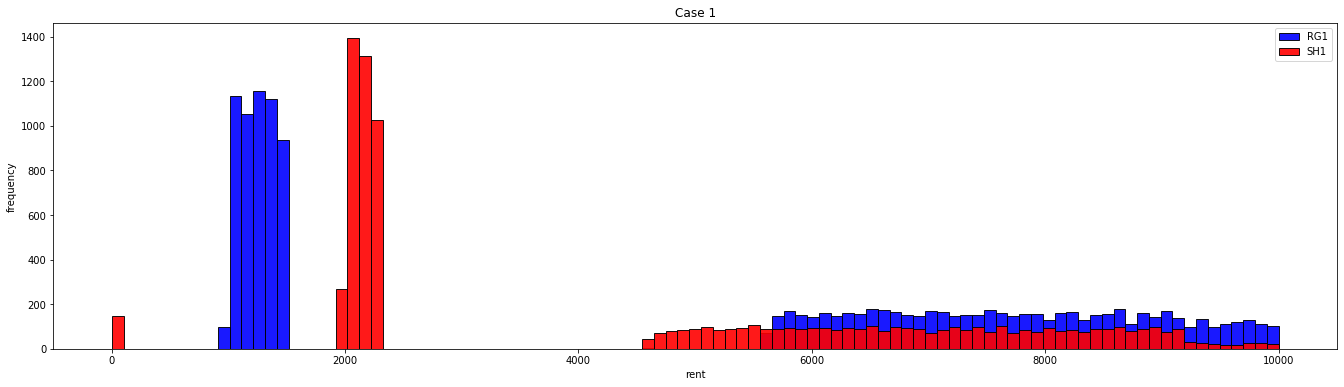

In [10]:
def generate_data2(pop_size, median_rent, mean_rent, start_end, seed):
    
    q_size = int(pop_size/4)
    
    np.random.seed(seed=seed)

    q1 = np.random.randint(start_end[0], start_end[1], size=q_size).astype(np.float)

    q2 = np.random.randint(start_end[2], start_end[3], size=q_size).astype(np.float)
   
    q2[-1] = median_rent
    

    q3 = np.random.randint(start_end[4], start_end[5], size=q_size).astype(np.float)
    q3[0] = median_rent
    
    q4 = np.random.randint(start_end[6], start_end[7], size=q_size).astype(np.float)

    res = np.concatenate((q1, q2, q3, q4))

    miss = ((mean_rent * pop_size) - np.sum(res))/(q_size-1)

    if miss > 0:
        q4[1:] += miss
    else:
        q2[:-1] += miss
        

    res1 = np.concatenate((q1, q2, q3, q4))
    
    np.random.seed(seed=None)
    return  res1

def plot_sh2(seed, start):
    
    start_end = [start, median_rent/2,
                 median_rent/2+1, median_rent,
                 median_rent + 1, median_rent * 2,
                 median_rent * 2 + 1, int(median_rent * 5.5)]
    
    res = generate_data2(sh_pop, median_rent, sh_mean_rent, start_end, seed = seed)
    return res 
   
def plot_rg2(seed, start):
    
    start_end = [\
                   start, 1500,\
                   median_rent/2, median_rent,\
                   
                   median_rent + 1000, median_rent * 2,\
                   
                   median_rent * 2 + 1, median_rent * 3]
        
    res = generate_data2(rg_pop, median_rent, rg_mean_rent, start_end, seed = seed)
    
    return res 

def scenario2(ax, seed, case, start1, start2, plot_var=False):

    rg1 = plot_rg2(seed, start1)
    sh1 = plot_sh2(seed, start2)
    
    ax.legend()
    ax.set_xlabel('rent')
    ax.set_ylabel('frequency')
    ax.set_title('Case {}'.format(case))

    ax.hist(rg1, bins=np.linspace(0, 10000, num=100), color='blue', label='RG1', alpha=.9,  edgecolor='black')


    plt_population(sh1, case, "SH", plot_var)
    ax.hist(sh1, bins=np.linspace(0, 10000, num=100), color='red', label='SH1', alpha=.9,  edgecolor='black')
    plt_population(rg1, case, "RG", plot_var)

_, ax = plt.subplots(ncols=1, figsize=(23,6))
scenario2(ax, 1000, '1', 1000, 2000, plot_var=True)

plt.legend()
plt.show()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [11]:
def alternative_cov(alpha, x, y):
    return (np.sqrt(np.var(x))*np.sqrt(np.var(y)))

In [14]:
sh_alpha = 0.97 
rg_alpha = 0.89 
sh_PHI_mean,rg_PHI_mean = 12500,8500
sh_PHI_median,rg_PHI_median = 12000,8000
import numpy as np

def generate_data4(pop_size, mean_rent, median_rent, max_rent, quartile,start=0):
    
  q1 = np.random.randint(start, median_rent-quartile, size=((pop_size)//4)).astype(np.float)
  q2 = np.random.randint(median_rent-quartile, median_rent, size=((pop_size)//4)).astype(np.float)
  q2[-1] = median_rent
  q3 = np.random.randint(median_rent+1, median_rent+quartile, size=((pop_size)//4)).astype(np.float)
  q3[0] = median_rent
  q4 = np.random.randint(median_rent+quartile, max_rent, size=((pop_size)//4)).astype(np.float)

  temp = np.concatenate((q1,q2, q3,q4))
  miss = ((mean_rent * pop_size) - np.sum(temp))/((pop_size/4)-1) 

  if miss>0:
    q4 += miss
  else:
    q1 += miss
  return np.concatenate((q1,q2, q3,q4))


def generate_data5(pop_size, start_end):
    
  #median_arr = np.array([median_rent, median_rent])
  q1 = np.random.randint(start_end[0], start_end[1], size=((pop_size)//4)).astype(np.float)
  q2 = np.random.randint(start_end[2], start_end[3], size=((pop_size)//4)).astype(np.float)
  q2[-1] = median_rent
  q3 = np.random.randint(start_end[4], start_end[5], size=((pop_size)//4)).astype(np.float)
  q3[0] = median_rent
  q4 = np.random.randint(start_end[6], start_end[7], size=((pop_size)//4)).astype(np.float)

  temp = np.concatenate((q1,q2, q3,q4))
  miss = ((mean_rent * pop_size) - np.sum(temp))/((pop_size/4)-1) 

  if miss>0:
    q4 += miss
  else:
    q1 += miss
  return np.concatenate((q1,q2, q3,q4))

sh_sample4 = generate_data4(sh_pop, sh_mean_rent, median_rent, 6500, 1000, 2400)
sh_PHI = generate_data4(sh_pop, sh_PHI_mean, sh_PHI_median, 12700, 50,10000)
SH_cov_rent_PHI = np.cov(sh_sample4,sh_PHI, ddof=0)[1][0]
sh_alternative_cov = alternative_cov(sh_alpha, sh_sample4, sh_PHI)

rg_sample4 = generate_data4(rg_pop, rg_mean_rent, median_rent, 9000, 1000, 3500)
rg_PHI = generate_data4(rg_pop, rg_PHI_mean, rg_PHI_median, 13500, 1000,2000)

rh_cov_rent_PHI11 = np.cov(rg_sample4,rg_PHI, ddof=0)[1][0]
al21= alternative_cov(rg_alpha, rg_sample4, rg_PHI)


plt_population(sh_sample4, '', "SH - Rent", False)
plt_population(sh_PHI, '', "SH - PHI", False)

plt_population(rg_sample4, '', "RG - Rent", False)
plt_population(rg_PHI, '', "RG - PHI", False)

 population: SH - Rent populationSize:16000 MeanResnt:6300.434758767818 MedianRent:4600.0 IQR:3738.5350712678173 
 population: SH - PHI populationSize:16000 MeanResnt:12500.16565716429 MedianRent:12000.0 IQR:762.6286571642922 
 population: RG - Rent populationSize:22000 MeanResnt:4199.8517983269685 MedianRent:4600.0 IQR:2814.6092016730313 
 population: RG - PHI populationSize:22000 MeanResnt:8500.102942245698 MedianRent:8000.0 IQR:2566.182351336607 


In [15]:
print('SH Covarince {}  Alternative Covarince {} alpha {} RATIO {}'.format(SH_cov_rent_PHI, sh_alternative_cov, sh_alpha, SH_cov_rent_PHI/sh_alternative_cov))
print('RG Covarince {}  Alternative Covarince {} alpha {} ratio {}'.format(rh_cov_rent_PHI11, al21, rg_alpha, rh_cov_rent_PHI11/al21)) 


SH Covarince 5932282.805606966  Alternative Covarince 6121126.6301130885 alpha 0.97 RATIO 0.9691488453159751
RG Covarince 7846396.722075711  Alternative Covarince 8809471.996705461 alpha 0.89 ratio 0.8906772988222316


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

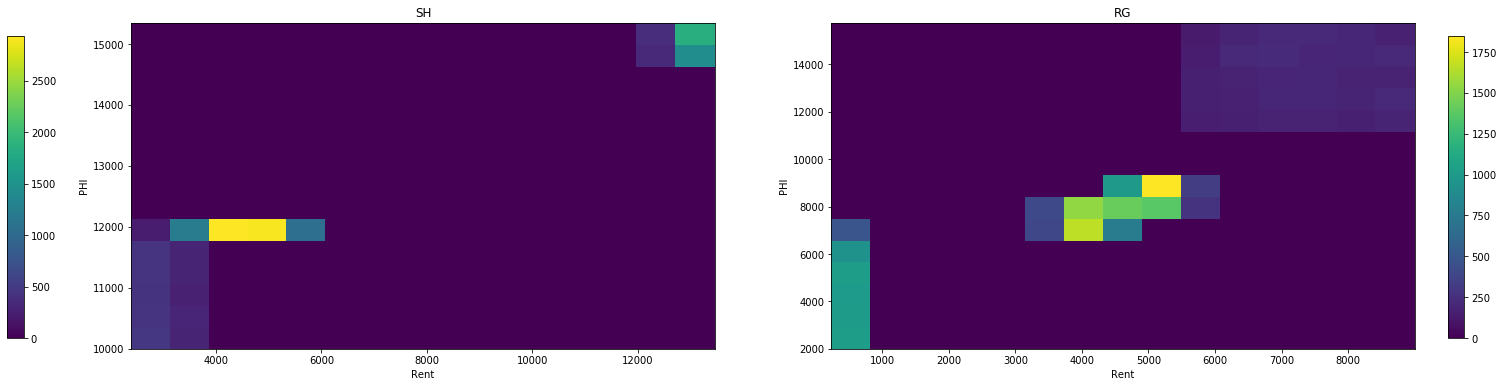

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(23,6))

_, _, _, im_sh = ax[0].hist2d(sh_sample4, sh_PHI, bins=15)
ax[0].set_xlabel('Rent')
ax[0].set_ylabel('PHI')
ax[0].set_title('SH')
cbaxes = fig.add_axes([0.05, 0.15, 0.01, 0.7]) 
fig.colorbar(im_sh, ax=ax, cax=cbaxes)

_, _, _, im_rg = ax[1].hist2d(rg_sample4, rg_PHI, bins=15)
ax[1].set_xlabel('Rent')
ax[1].set_ylabel('PHI')
ax[1].set_title('RG')
cbaxes = fig.add_axes([0.92, 0.15, 0.01, 0.7]) 
fig.colorbar(im_rg, ax=ax, cax=cbaxes)
plt.show()

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

Solution: 

$$Var(X + Y + Z) = Var(X + Y ) + Var(Z) + 2 · Cov(X + Y, Z)= (Var(X) + Var(Y ) + 2 · Cov(X, Y )) + Var(Z) + 2 · E[(X + Y − 𝐸[X] − 𝐸[Y] )(Z − 𝐸[Z])]  $$ (1) 

 Openning E[(X + Y − 𝐸[X] − 𝐸[Y] )(Z − 𝐸[Z])]:
$$ E[(X + Y − 𝐸[X] − 𝐸[Y] )(Z − 𝐸[Z])] = E[(X − E[x])(Z − E[Z]) + (Y − E[Y] )(Z − E[Z])]$$
$$= Cov(X, Z) + Cov(Y, Z)$$ (2)

Putting (2) in (1):
$$Var(X + Y + Z) = Var(X) + Var(Y ) + Var(Z) + 2Cov(X, Z) + 2Cov(Y, Z) + 2Cov(X, Z)$$ (3)

If $X, $Y and Z$ $ are pairwise independent:
$$ Cov(X, Z) = Cov(Y, Z) = Cov(X, Z) = 0$$ (4)

$ putting $ (4) in (3)
$$\Rightarrow Var(X + Y + Z) = Var(X) + Var(Y ) + Var(Z)$$



If $X,Y,Z$ are pairwise independant, ther are not necessarily collectively independent. <br>

Proving by example:<br>

Suppose X and Y are two independent tosses of a fair coin, where we designate 1 for heads and 0 for tails. Let the third random variable Z be equal to 1 if exactly one of those coin tosses resulted in "heads", and 0 otherwise.

Then jointly the triple (X, Y, Z) has the following probability distribution:
        
      


(X,Y,Z) = \begin{cases}
(0,0,0)\space with \space Probability \space 1/4\\
(0,1,1)\space with \space Probability \space 1/4 \\
(1,0,1)\space with \space Probability \space 1/4\\
(1,1,0)\space with \space Probability \space 1/4\\
\end{cases}



The marginal probability distributions are identical 
F(X = 0) = F(Y = 0) = F(Z=0) = 1/2  F(X=0) = F(X=1) * F(Y=1) + F(X=1) * F(Y=0)= 1/2 * 1/2 + 1/2*1/2 = 1/2 
F(X = 1) = F(Y = 1) = F(Z=1) = 1/2

The bivariate distributions are also equals.
Fxy = Fxz = Fyz where Fxy(0,0) = Fxy(0,1) = Fxy(1,0) = Fxy(1,1) = 1/4 

Since each of the pairwise joint distributions equals the product of their respective marginal distributions, the variables are pairwise independent:

X and Y are independent<br>
X and Z are independent<br>
Y and Z are independent<br>

However, X, Y, and Z are not mutually independent, since 
$${\displaystyle f_{X,Y,Z}(x,y,z)\neq f_{X}(x)f_{Y} (y)f_{Z}(z)}$$

the left side equalling for example $$1/4 for (x, y, z) = (0, 0, 0) $$while the right side equals 1/8 for (x, y, z) = (0, 0, 0).


### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [17]:
def NFoldConv(P, n):
    
    if n <= 0:
        return {}

    new_Q = {}
    dist_length = len(P[0])
    if n > 1:
        
        prev_Q = NFoldConv(P, n - 1)
        
        for i in prev_Q.keys():
            for j in range(dist_length):
                new_Q[P[0][j] + i] = 0
                
        for i, q_value in prev_Q.items():  
            for j in range(dist_length):  
                new_Q[P[0][j] + i] += P[1][j] * q_value
    
    else:
        new_Q = {P[0][i] : P[1][i] for i in range(dist_length)}
        
    return new_Q



#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [18]:
P2 = [[1,2,3,4,5,6,7,8],[1.0/8.0 for _ in range(8)]]
NFoldConv(P2,17)

{17: 4.440892098500626e-16,
 18: 7.549516567451064e-15,
 19: 6.794564910705958e-14,
 20: 4.303224443447107e-13,
 21: 2.1516122217235534e-12,
 22: 9.036771331238924e-12,
 23: 3.313482821454272e-11,
 24: 1.088715784192118e-10,
 25: 3.2660718574106795e-10,
 26: 9.07134811711785e-10,
 27: 2.3577291230481023e-09,
 28: 5.782673007104222e-09,
 29: 1.3473395732432891e-08,
 30: 2.998400727705075e-08,
 31: 6.401734875538523e-08,
 32: 1.3161584089260714e-07,
 33: 2.613809253482202e-07,
 34: 5.027422242953605e-07,
 35: 9.38663699212583e-07,
 36: 1.7045993589981379e-06,
 37: 3.015970226893927e-06,
 38: 5.206881849684208e-06,
 39: 8.783168114145923e-06,
 40: 1.449303744882613e-05,
 41: 2.3418493098503745e-05,
 42: 3.7090165106334894e-05,
 43: 5.762708941681183e-05,
 44: 8.790117605705916e-05,
 45: 0.00013172354057466862,
 46: 0.0001940465160554794,
 47: 0.000281171099826949,
 48: 0.00040094502474907756,
 49: 0.0005629319236253316,
 50: 0.0007785276598544222,
 51: 0.0010609964316725673,
 52: 0.001425

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [19]:
stock_dist = [[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]]
print('After 2 days:')
NFoldConv(stock_dist,2)

After 2 days:


{-2: 0.09,
 -1: 0.09,
 0: 0.1125,
 1: 0.135,
 2: 0.21749999999999997,
 3: 0.12,
 4: 0.0975,
 5: 0.075,
 6: 0.0625}

In [20]:
print('After 5 days:')
NFoldConv(stock_dist, 5)

After 5 days:


{-5: 0.00243,
 -4: 0.006075,
 -3: 0.012149999999999998,
 -2: 0.021262499999999997,
 -1: 0.038221874999999995,
 0: 0.053738437499999986,
 1: 0.07074843749999998,
 2: 0.08720156249999998,
 3: 0.10407656249999997,
 4: 0.10719843749999998,
 5: 0.10638843749999999,
 6: 0.09968906249999998,
 7: 0.08860781249999998,
 8: 0.0683578125,
 9: 0.0517078125,
 10: 0.0363571875,
 11: 0.0233671875,
 12: 0.0120703125,
 13: 0.0064453125,
 14: 0.0029296875,
 15: 0.0009765625}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [21]:
five_days_dist = NFoldConv(stock_dist, 5)

We first calculate the gain/loss distribution after 5 days, then for probability to gain more than 7NIS we need to sum all the probabilities of gainning more than 7NIS.

For lossing more than 4NIS we need to sum all probabilities to lose more than 4NIS.

In [22]:
np.sum([prob for (val,prob) in five_days_dist.items() if val > 7])

0.202211875

In [23]:
np.sum([prob for (val,prob) in five_days_dist.items() if val < -4])

0.00243